In [1]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("car_price.csv",encoding='latin-1')

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,...,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,...,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


In [5]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
#finding out the missing values
df.isna().sum()

symboling            0
CarName              0
fueltype             3
aspiration           2
doornumber           1
carbody              0
drivewheel           0
enginelocation      11
wheelbase            2
carlength            3
carwidth             4
carheight            2
curbweight           1
enginetype           0
cylindernumber       1
enginesize           0
fuelsystem           0
boreratio            2
stroke               3
compressionratio     2
horsepower           0
peakrpm              7
citympg              3
highwaympg           3
price                0
dtype: int64

<Axes: >

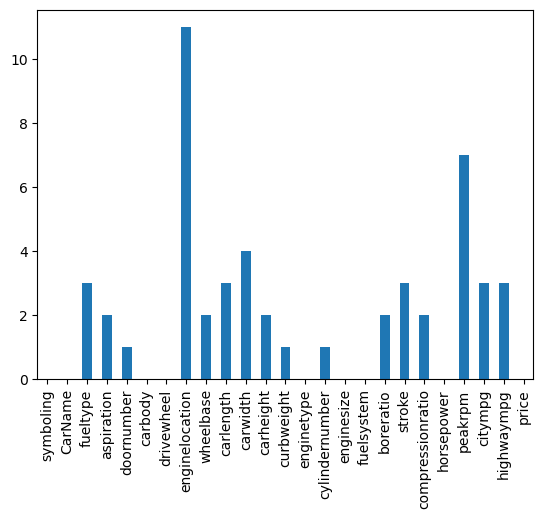

In [7]:
df.isna().sum().plot(kind='bar')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         153 non-null    int64  
 1   CarName           153 non-null    object 
 2   fueltype          150 non-null    object 
 3   aspiration        151 non-null    object 
 4   doornumber        152 non-null    object 
 5   carbody           153 non-null    object 
 6   drivewheel        153 non-null    object 
 7   enginelocation    142 non-null    object 
 8   wheelbase         151 non-null    float64
 9   carlength         150 non-null    float64
 10  carwidth          149 non-null    float64
 11  carheight         151 non-null    float64
 12  curbweight        152 non-null    float64
 13  enginetype        153 non-null    object 
 14  cylindernumber    152 non-null    object 
 15  enginesize        153 non-null    int64  
 16  fuelsystem        153 non-null    object 
 1

In [10]:
#drop all missing values
df_num=df.select_dtypes(['int64','float64'])

In [11]:
df_num

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,99.8,176.6,66.2,54.3,2337.0,109,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,114.2,198.9,68.4,56.7,3285.0,120,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,95.9,173.2,66.3,50.2,2833.0,156,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,95.7,158.7,63.6,54.5,2040.0,92,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,98.4,176.2,65.6,53.0,2975.0,146,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,113.0,199.6,69.6,52.8,4066.0,258,3.63,4.17,8.1,176,4750.0,15.0,19.0,35550.0
149,1,93.7,167.3,63.8,50.8,2191.0,98,2.97,3.23,9.4,68,5500.0,31.0,38.0,7609.0
150,0,100.4,180.2,NaN,55.1,2579.0,97,3.01,3.40,23.0,68,4500.0,33.0,38.0,13845.0
151,2,98.4,176.2,65.6,52.0,2714.0,146,3.62,3.50,9.3,116,4800.0,24.0,30.0,11549.0


In [12]:
#keeping all categorical columns together
df_cat=df.select_dtypes('object')

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df_cat

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
1,peugeot 504,gas,std,four,wagon,rwd,front,l,four,mpfi
2,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi
3,toyota corona,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
4,toyota cressida,gas,std,two,convertible,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
148,jaguar xf,NaN,std,four,sedan,rwd,front,dohc,six,mpfi
149,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,ohc,four,2bbl
150,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
151,toyota corolla,gas,std,two,hatchback,rwd,front,ohc,four,mpfi


In [15]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         153 non-null    object
 1   fueltype        150 non-null    object
 2   aspiration      151 non-null    object
 3   doornumber      152 non-null    object
 4   carbody         153 non-null    object
 5   drivewheel      153 non-null    object
 6   enginelocation  142 non-null    object
 7   enginetype      153 non-null    object
 8   cylindernumber  152 non-null    object
 9   fuelsystem      153 non-null    object
dtypes: object(10)
memory usage: 12.1+ KB


In [16]:
#dropping the missing value
df_1=df.dropna()

In [20]:
df_1

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
6,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340.0,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200.0,26.0,32.0,9960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3020.0,l,four,120,mpfi,3.46,3.19,8.4,97,5000.0,19.0,24.0,11900.0
147,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,173.4,65.2,54.7,2324.0,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200.0,27.0,34.0,8949.0
149,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,2191.0,ohc,four,98,2bbl,2.97,3.23,9.4,68,5500.0,31.0,38.0,7609.0
151,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2714.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800.0,24.0,30.0,11549.0


In [21]:
df_1.shape

(109, 25)

In [22]:
df_2=df.dropna(axis=0) #0 mean remove rows and 1 means remove colums

In [23]:
df_2.shape

(109, 25)

In [26]:
df_3=df.dropna(axis=1)   #0 mean remove rows and 1 means remove colums

In [27]:
df_3.shape

(153, 9)

In [28]:
df_num=df_num.fillna(df_num.mean())

In [29]:
#mean imputation
df_4=df.select_dtypes(include=['int64','float64']).fillna(df.select_dtypes(include=['int64','float64']).mean())

In [30]:
df_4

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,99.8,176.6,66.200000,54.3,2337.0,109,3.19,3.40,10.0,102,5500.000000,24.0,30.0,13950.0
1,0,114.2,198.9,68.400000,56.7,3285.0,120,3.46,2.19,8.4,95,5000.000000,19.0,24.0,16695.0
2,3,95.9,173.2,66.300000,50.2,2833.0,156,3.58,3.86,7.0,145,5000.000000,19.0,24.0,12629.0
3,1,95.7,158.7,63.600000,54.5,2040.0,92,3.05,3.03,9.0,62,4800.000000,31.0,38.0,6338.0
4,2,98.4,176.2,65.600000,53.0,2975.0,146,3.62,3.50,9.3,116,5096.232877,24.0,30.0,17669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,113.0,199.6,69.600000,52.8,4066.0,258,3.63,4.17,8.1,176,4750.000000,15.0,19.0,35550.0
149,1,93.7,167.3,63.800000,50.8,2191.0,98,2.97,3.23,9.4,68,5500.000000,31.0,38.0,7609.0
150,0,100.4,180.2,65.997987,55.1,2579.0,97,3.01,3.40,23.0,68,4500.000000,33.0,38.0,13845.0
151,2,98.4,176.2,65.600000,52.0,2714.0,146,3.62,3.50,9.3,116,4800.000000,24.0,30.0,11549.0


In [31]:
df_4.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [33]:
#median imputation
df_5=df.select_dtypes(include=['int64','float64']).fillna(df.select_dtypes(include=['int64','float64']).median())

In [34]:
df_5

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,99.8,176.6,66.2,54.3,2337.0,109,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,114.2,198.9,68.4,56.7,3285.0,120,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,95.9,173.2,66.3,50.2,2833.0,156,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,95.7,158.7,63.6,54.5,2040.0,92,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,98.4,176.2,65.6,53.0,2975.0,146,3.62,3.50,9.3,116,5100.0,24.0,30.0,17669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,113.0,199.6,69.6,52.8,4066.0,258,3.63,4.17,8.1,176,4750.0,15.0,19.0,35550.0
149,1,93.7,167.3,63.8,50.8,2191.0,98,2.97,3.23,9.4,68,5500.0,31.0,38.0,7609.0
150,0,100.4,180.2,65.6,55.1,2579.0,97,3.01,3.40,23.0,68,4500.0,33.0,38.0,13845.0
151,2,98.4,176.2,65.6,52.0,2714.0,146,3.62,3.50,9.3,116,4800.0,24.0,30.0,11549.0


In [35]:
df_5.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [36]:
df_cat.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [37]:
df['CarName'].fillna(df['CarName'].mode(),inplace=True)

C:\Users\pooja\AppData\Local\Temp\ipykernel_16168\3868484483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarName'].fillna(df['CarName'].mode(),inplace=True)


In [38]:
df['CarName'].isna().sum()

0

In [39]:
#mode imputation
for i in df.select_dtypes('object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\pooja\AppData\Local\Temp\ipykernel_16168\3742177117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [41]:
df_cat.isna().sum()

CarName            0
fueltype           3
aspiration         2
doornumber         1
carbody            0
drivewheel         0
enginelocation    11
enginetype         0
cylindernumber     1
fuelsystem         0
dtype: int64